### Ideal Filter

<ipython-input-15-8a676a73e746>:16: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(x^2 + y^2)


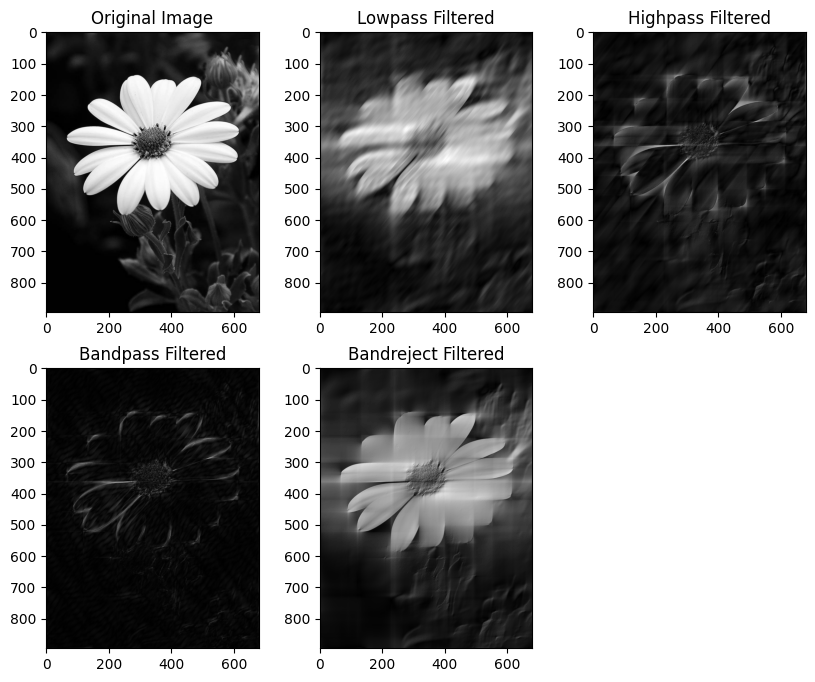

In [ ]:
#IDEAL
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ideal_filter(shape, D0, filter_type='lowpass'):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2

    # Create a meshgrid of distances from the center
    x = np.arange(cols) - center_col
    y = np.arange(rows) - center_row
    x, y = np.meshgrid(x, y)

    # Compute the distance matrix
    distance = np.sqrt(x^2 + y^2)

    # Create the filter based on the filter type
    if filter_type == 'lowpass':
        H = (distance <= D0).astype(float)
    elif filter_type == 'highpass':
        H = (distance > D0).astype(float)
    elif filter_type == 'bandpass':
        H = ((distance >= D0[0]) & (distance <= D0[1])).astype(float)
    elif filter_type == 'bandreject':
        H = ((distance < D0[0]) | (distance > D0[1])).astype(float)
    else:
        raise ValueError("Invalid filter type")

    return H

def apply_frequency_filter(image, filter_type='lowpass', D0=30):
    # Convert the image to grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Fourier transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    # Create the frequency filter
    rows, cols = image.shape
    H = ideal_filter(image.shape, D0, filter_type)

    # Apply the filter in the frequency domain
    f_filtered = f_shift * H

    # Inverse Fourier transform to get the image back to spatial domain
    img_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(f_filtered)))

    return img_filtered

# Read an example image
image = cv2.imread('/content/flw.jpg', cv2.IMREAD_GRAYSCALE)

# Apply lowpass filter
lowpass_filtered = apply_frequency_filter(image, filter_type='lowpass', D0=5)

# Apply highpass filter
highpass_filtered = apply_frequency_filter(image, filter_type='highpass', D0=2)

# Apply bandpass filter
bandpass_filtered = apply_frequency_filter(image, filter_type='bandpass', D0=(5, 40))

# Apply bandreject filter
bandreject_filtered = apply_frequency_filter(image, filter_type='bandreject', D0=(20, 40))

# Plotting the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(lowpass_filtered, cmap='gray')
plt.title('Lowpass Filtered')

plt.subplot(2, 3, 3)
plt.imshow(highpass_filtered, cmap='gray')
plt.title('Highpass Filtered')

plt.subplot(2, 3, 4)
plt.imshow(bandpass_filtered, cmap='gray')
plt.title('Bandpass Filtered')

plt.subplot(2, 3, 5)
plt.imshow(bandreject_filtered, cmap='gray')
plt.title('Bandreject Filtered')

plt.show()

### Butterworth Filter

<ipython-input-22-fa9649794e3c>:24: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + ((distance**2 - D0[0]**2) / (distance * (D0[1]**2 - D0[0]**2)))**(2 * n))
<ipython-input-22-fa9649794e3c>:26: RuntimeWarning: divide by zero encountered in divide
  H = 1 - 1 / (1 + ((distance**2 - D0[0]**2) / (distance * (D0[1]**2 - D0[0]**2)))**(2 * n))


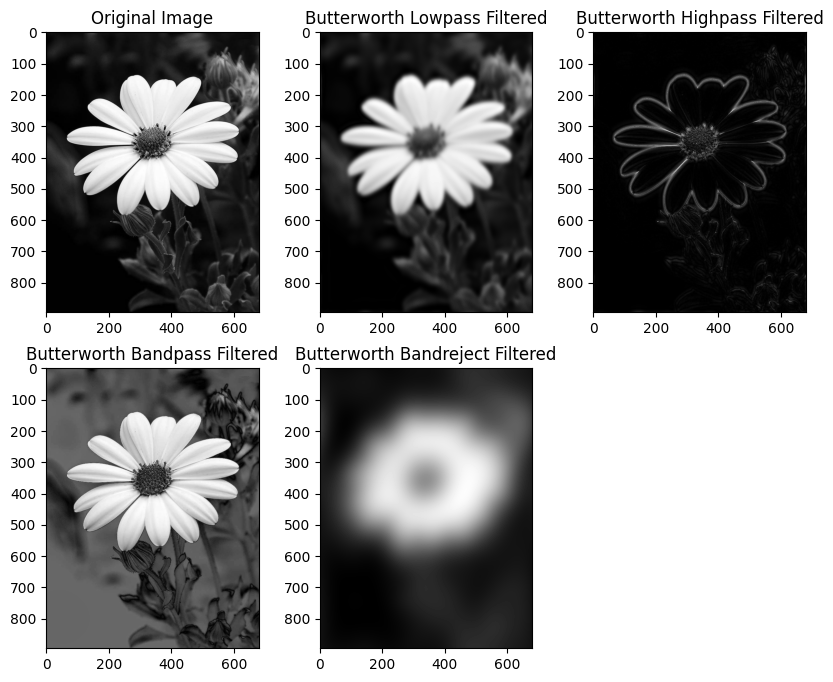

In [ ]:
#Butterworth
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworth_filter(shape, D0, n, filter_type='lowpass'):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2

    # Create a meshgrid of distances from the center
    x = np.arange(cols) - center_col
    y = np.arange(rows) - center_row
    x, y = np.meshgrid(x, y)

    # Compute the distance matrix
    distance = np.sqrt(x**2 + y**2)

    # Create the filter based on the filter type
    if filter_type == 'lowpass':
        H = 1 / (1 + (distance / D0)**(2 * n))
    elif filter_type == 'highpass':
        H = 1 - 1 / (1 + (distance / D0)**(2 * n))
    elif filter_type == 'bandpass':
        H = 1 / (1 + ((distance**2 - D0[0]**2) / (distance * (D0[1]**2 - D0[0]**2)))**(2 * n))
    elif filter_type == 'bandreject':
        H = 1 - 1 / (1 + ((distance**2 - D0[0]**2) / (distance * (D0[1]**2 - D0[0]**2)))**(2 * n))
    else:
        raise ValueError("Invalid filter type")

    return H

def apply_butterworth_filter(image, filter_type='lowpass', D0=30, n=2):
    # Convert the image to grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Fourier transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    # Create the frequency filter
    rows, cols = image.shape
    H = butterworth_filter(image.shape, D0, n, filter_type)

    # Apply the filter in the frequency domain
    f_filtered = f_shift * H

    # Inverse Fourier transform to get the image back to spatial domain
    img_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(f_filtered)))

    return img_filtered

# Read an example image
image = cv2.imread('/content/flw.jpg', cv2.IMREAD_GRAYSCALE)

# Define the cutoff frequency and filter order
cutoff_frequency = 30
filter_order = 2

# Apply Butterworth lowpass filter
butterworth_lowpass_filtered = apply_butterworth_filter(image, filter_type='lowpass', D0=cutoff_frequency, n=filter_order)

# Apply Butterworth highpass filter
butterworth_highpass_filtered = apply_butterworth_filter(image, filter_type='highpass', D0=cutoff_frequency, n=filter_order)

# Apply Butterworth bandpass filter
butterworth_bandpass_filtered = apply_butterworth_filter(image, filter_type='bandpass', D0=(20, 40), n=filter_order)

# Apply Butterworth bandreject filter
butterworth_bandreject_filtered = apply_butterworth_filter(image, filter_type='bandreject', D0=(40, 45), n=filter_order)

# Plotting the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(butterworth_lowpass_filtered, cmap='gray')
plt.title('Butterworth Lowpass Filtered')

plt.subplot(2, 3, 3)
plt.imshow(butterworth_highpass_filtered, cmap='gray')
plt.title('Butterworth Highpass Filtered')

plt.subplot(2, 3, 4)
plt.imshow(butterworth_bandpass_filtered, cmap='gray')
plt.title('Butterworth Bandpass Filtered')

plt.subplot(2, 3, 5)
plt.imshow(butterworth_bandreject_filtered, cmap='gray')
plt.title('Butterworth Bandreject Filtered')

plt.show()

### Guassian Filter

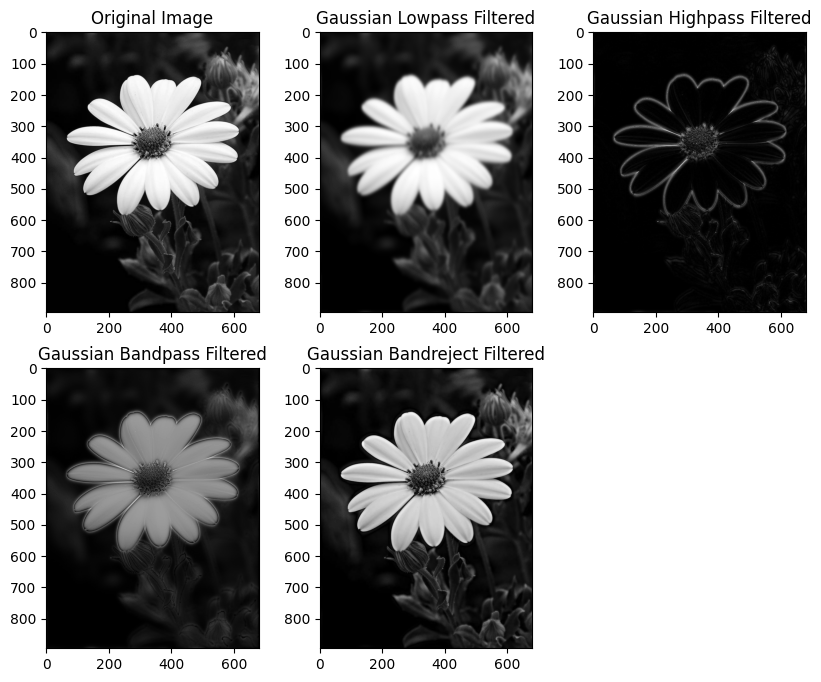

In [ ]:
#Gaussian
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_filter(shape, D0, filter_type='lowpass'):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2

    # Create a meshgrid of distances from the center
    x = np.arange(cols) - center_col
    y = np.arange(rows) - center_row
    x, y = np.meshgrid(x, y)

    # Compute the distance matrix
    distance = np.sqrt(x**2 + y**2)

    # Create the filter based on the filter type
    if filter_type == 'lowpass':
        H = np.exp(-(distance**2) / (2 * (D0**2)))
    elif filter_type == 'highpass':
        H = 1 - np.exp(-(distance**2) / (2 * (D0**2)))
    elif filter_type == 'bandpass':
        H = 1 - np.exp(-(distance**2) / (2 * (D0[1]**2))) - (np.exp(-(distance**2) / (2 * (D0[0]**2))))
    elif filter_type == 'bandreject':
        H = np.exp(-(distance**2) / (2 * (D0[1]**2))) + (1 - np.exp(-(distance**2) / (2 * (D0[0]**2))))
    else:
        raise ValueError("Invalid filter type")

    return H

def apply_gaussian_filter(image, filter_type='lowpass', D0=30):
    # Convert the image to grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Fourier transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    # Create the frequency filter
    rows, cols = image.shape
    H = gaussian_filter(image.shape, D0, filter_type)

    # Apply the filter in the frequency domain
    f_filtered = f_shift * H

    # Inverse Fourier transform to get the image back to spatial domain
    img_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(f_filtered)))

    return img_filtered

# Read an example image
image = cv2.imread('/content/flw.jpg', cv2.IMREAD_GRAYSCALE)

# Define the cutoff frequency
cutoff_frequency = 30

# Apply Gaussian lowpass filter
gaussian_lowpass_filtered = apply_gaussian_filter(image, filter_type='lowpass', D0=cutoff_frequency)

# Apply Gaussian highpass filter
gaussian_highpass_filtered = apply_gaussian_filter(image, filter_type='highpass', D0=cutoff_frequency)

# Apply Gaussian bandpass filter
gaussian_bandpass_filtered = apply_gaussian_filter(image, filter_type='bandpass', D0=(20, 40))

# Apply Gaussian bandreject filter
gaussian_bandreject_filtered = apply_gaussian_filter(image, filter_type='bandreject', D0=(20, 40))

# Plotting the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(gaussian_lowpass_filtered, cmap='gray')
plt.title('Gaussian Lowpass Filtered')

plt.subplot(2, 3, 3)
plt.imshow(gaussian_highpass_filtered, cmap='gray')
plt.title('Gaussian Highpass Filtered')

plt.subplot(2, 3, 4)
plt.imshow(gaussian_bandpass_filtered, cmap='gray')
plt.title('Gaussian Bandpass Filtered')

plt.subplot(2, 3, 5)
plt.imshow(gaussian_bandreject_filtered, cmap='gray')
plt.title('Gaussian Bandreject Filtered')

plt.show()